# Recommendation system

### Installation of Libraries

In [1]:
!pip install pandas
!pip install matplotlib
!pip install xlrd==1.2.0
!pip install openpyxl
!pip install scipy
!pip install seaborn
!pip install scikit-learn
!pip install numpy
!pip install tensorflow
!pip install scikit-surprise==1.1.3

In [220]:
import pandas as pd
import numpy as np
import re as re
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from scipy.sparse import csr_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl

mpl.style.use('ggplot')  # optional: for ggplot-like style
# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


### Data understanding

### Read customers

In [221]:
customers = pd.read_json(r'C:\Users\Chidera\Documents\data\customers.json')
print(customers.shape)
customers.head()

(678, 2)


,Id,NickName
0,103603,1000kgthanh
1,103760,999999999ok
2,103829,ac7ive
3,1,admin
4,103839,ahkk.nguyen


### Read products

In [222]:
products = pd.read_json(r'C:\Users\Chidera\Documents\data\products.json')
print(products.shape)
products.head()

(691, 3)


,Id,Name,UnitPrice
0,1,Build your own computer,1200.0
1,2,Digital Storm VANQUISH 3 Custom Performance PC,1259.0
2,3,Lenovo IdeaCentre 600 All-in-One PC,500.0
3,4,Apple MacBook Pro 13-inch,1800.0
4,5,Asus N551JK-XO076H Laptop,1500.0


### Read ratings

In [223]:
ratings = pd.read_json(r'C:\Users\Chidera\Documents\data\ratings.json')
print(ratings.shape)
ratings.head()

(130754, 4)


,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


### Data description

In [224]:
ratings.head()

,CustomerID,ProductID,Rate,CreateDate
0,103416,619,1,2018/01/01 01:36:30
1,103654,411,1,2018/01/01 01:36:35
2,103954,298,3,2018/01/01 01:36:38
3,103672,361,5,2018/01/01 01:37:15
4,103960,536,5,2018/01/01 02:36:25


In [225]:
ratings.shape

(130754, 4)

In [226]:
ratings.dtypes

CustomerID     int64
ProductID      int64
Rate           int64
CreateDate    object
dtype: object

In [227]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130754 entries, 0 to 130753
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   CustomerID  130754 non-null  int64 
 1   ProductID   130754 non-null  int64 
 2   Rate        130754 non-null  int64 
 3   CreateDate  130754 non-null  object
dtypes: int64(3), object(1)
memory usage: 4.0+ MB


### Data cleaning

In [228]:
#Five point summary 
ratings.describe()['Rate'].T

count    130754.000000
mean          3.188598
std           1.515812
min           1.000000
25%           2.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: Rate, dtype: float64

In [229]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(ratings.Rate.min()))
print('Maximum rating is: %d' %(ratings.Rate.max()))

Minimum rating is: 1
Maximum rating is: 5


In [230]:
#Check for missing values
print('Number of missing values across columns: \n',ratings.isnull().sum())

Number of missing values across columns: 
 CustomerID    0
ProductID     0
Rate          0
CreateDate    0
dtype: int64


### Dropping the TimeStamp Column

In [231]:
#Dropping the Timestamp column
ratings.drop(['CreateDate'], axis=1,inplace=True)

In [232]:
ratings.head()

,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5


### Handling duplicates

In [233]:
temp_df =ratings.append(ratings)
temp_df.shape

C:\Users\Chidera\AppData\Local\Temp\ipykernel_26396\849576993.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df =ratings.append(ratings)


(261508, 3)

In [234]:
temp_df = temp_df.drop_duplicates()
temp_df.shape

(123840, 3)

In [235]:
# Select duplicate row based on all columns by deleting one of the duplicate 
df2 = ratings[ratings.duplicated()]
df2

,CustomerID,ProductID,Rate
950,103820,162,5
1063,103367,351,5
1508,103765,336,5
1662,103320,332,5
1765,103907,79,1
...,...,...,...
130736,103907,129,1
130739,103907,624,1
130742,103907,163,1
130746,103907,47,1


In [236]:
# Select duplicate row based on all columns without deleting  any one of the duplicate 
df2 = ratings[ratings.duplicated(keep=False)]
df2

,CustomerID,ProductID,Rate
13,103651,388,5
15,103672,52,5
20,103544,62,5
40,103765,523,5
55,6,258,1
...,...,...,...
130736,103907,129,1
130739,103907,624,1
130742,103907,163,1
130746,103907,47,1


### Deleting duplicate using the all column

In [237]:
ratings = ratings.drop_duplicates()
ratings

,CustomerID,ProductID,Rate
0,103416,619,1
1,103654,411,1
2,103954,298,3
3,103672,361,5
4,103960,536,5
...,...,...,...
130749,103907,501,1
130750,103907,200,1
130751,103907,184,1
130752,103907,211,1


#### Pearson Correlation

The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

1: Perfect positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Perfect negative linear correlation.
Pearson Correlation is the default method of the function "corr". Like before, we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

In [238]:
ratings.corr()

,CustomerID,ProductID,Rate
CustomerID,1.000000,0.003885,0.036089
ProductID,0.003885,1.000000,-0.000497
Rate,0.036089,-0.000497,1.000000


<Axes: >

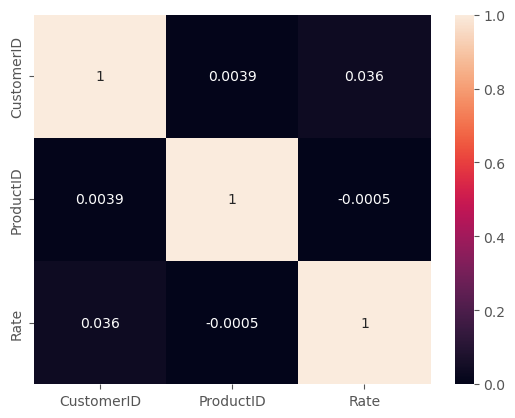

In [239]:
sns.heatmap(ratings.corr(), annot=True)

### Data Exploration and Visualization

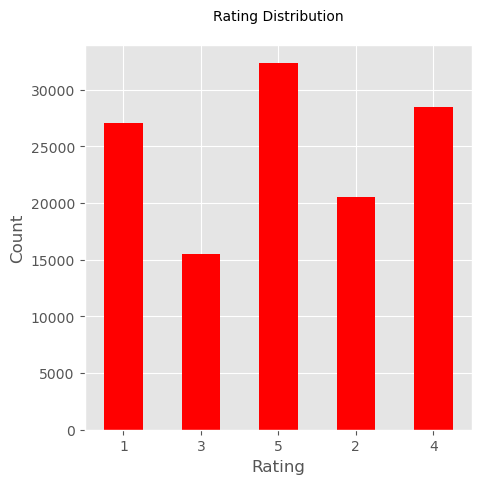

In [240]:
plt.rc("font",size=10)
ratings.Rate.value_counts(sort=False).plot(kind='bar', figsize=(5, 5), rot=0, color='red')
plt.title('Rating Distribution\n', fontsize=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


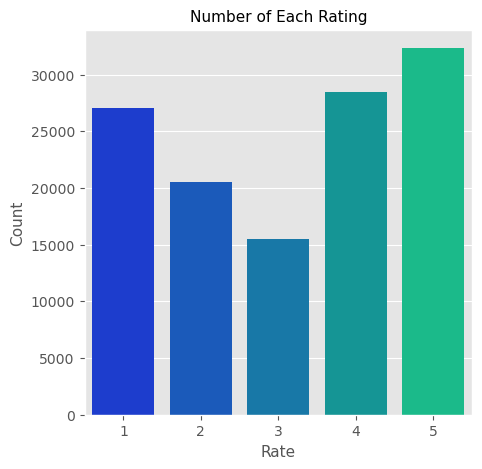

In [241]:
plt.figure(figsize=(5,5))
sns.countplot(x='Rate', data=ratings, palette='winter')
plt.xlabel('Rate', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Number of Each Rating', fontsize=11)
plt.show()

### Unique customers and products

In [242]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",ratings.shape[0])
print("Total No of Users   :", len(np.unique(ratings.CustomerID)))
print("Total No of products  :", len(np.unique(ratings.ProductID)))

Total data 
--------------------------------------------------

Total no of ratings : 123840
Total No of Users   : 344
Total No of products  : 691


### Analysis of rating given by the user

In [243]:
no_of_rated_products_per_user = ratings.groupby(by='CustomerID')['Rate'].count().sort_values(ascending=False)
no_of_rated_products_per_user.head()

CustomerID
103996    1202
103505    1143
103367    1099
103873    1054
103707    1050
Name: Rate, dtype: int64

In [244]:
no_of_rated_products_per_user.describe()

count     344.000000
mean      360.000000
std       230.552183
min       100.000000
25%       195.000000
50%       278.000000
75%       458.250000
max      1202.000000
Name: Rate, dtype: float64

In [245]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

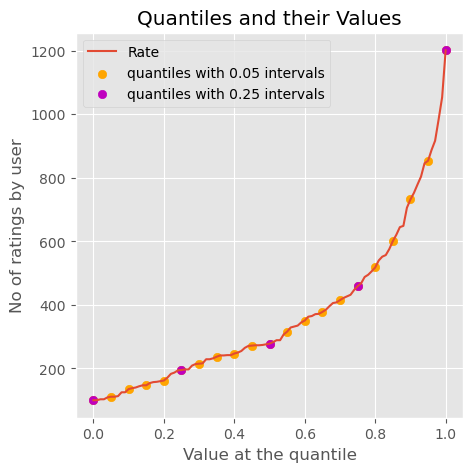

In [246]:
plt.figure(figsize=(5,5))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [247]:
df_rating=pd.DataFrame({'Number of Rating':ratings.groupby('ProductID').count()['Rate'],
                        'Mean Rating':ratings.groupby('ProductID').mean()['Rate']})

In [248]:
df_rating.head()

,Number of Rating,Mean Rating
ProductID,,
1,187,3.229947
2,189,3.037037
3,192,3.182292
4,176,3.318182
5,189,3.259259


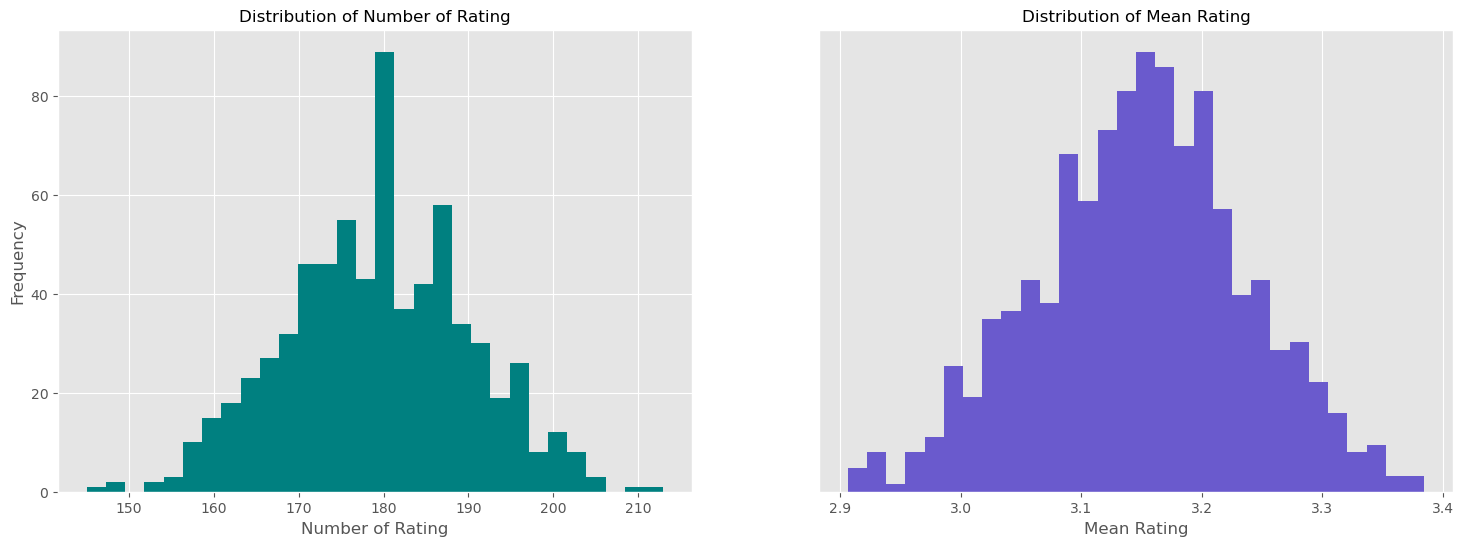

In [249]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.hist(x='Number of Rating',data=df_rating,bins=30,color='teal')
plt.title('Distribution of Number of Rating', fontsize=12)
plt.xlabel('Number of Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1,2,2)
plt.hist(x='Mean Rating',data=df_rating,bins=30, color='slateblue')
plt.title('Distribution of Mean Rating', fontsize=12)
plt.xlabel('Mean Rating', fontsize=12)
plt.yticks([])
plt.show()

In [250]:
# Split the data into training and test sets
X_train, X_test = train_test_split(ratings, test_size=0.2, random_state=42)

In [251]:
# Calculate the sparsity of the train, validation & test rating matrices
def calc_sparsity(label, ratings):
    sparsity = float(len(ratings.nonzero()[0]))
    sparsity /= (ratings.shape[0] * ratings.shape[1])
    sparsity *= 100
    print('{:s} Sparsity: {:4.2f}%'.format(label, sparsity))

### Autoencoder model

### Simple autoencoder

###### Step 1: getting the dataset into required  form for modelling

In [252]:
# Create user-item interaction matrix (sparse matrix)
interaction_matrix = pd.pivot_table(ratings, index='CustomerID', columns='ProductID', values='Rate', fill_value=0)

In [253]:
interaction_matrix

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
13874,5.0,0.0,5.0,0.000000,4.0,0.0,0.0,3.0,5.0,5.0,...,3.5,4.0,4.0,0.0,5.0,0.0,0.0,4.0,3.0,5.0
13879,0.0,3.5,2.0,0.000000,2.0,0.0,0.0,0.0,0.0,3.5,...,5.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
13885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,4.0,...,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.0,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
103991,0.0,0.0,0.0,2.000000,5.0,2.0,0.0,2.0,0.0,5.0,...,2.0,0.0,0.0,3.5,2.0,0.0,0.0,0.0,0.0,0.0
103992,0.0,0.0,0.0,4.000000,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0


In [254]:
# Convert the interaction matrix to a NumPy array
X = interaction_matrix.values


In [255]:
# Normalize the ratings to a range of 0 to 1 (if needed)
max_rating = np.max(X)
X = X / max_rating

In [256]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [257]:
# Autoencoder model architecture
input_shape = X_train.shape[1]  # Number of items
latent_dim = 1  # Number of latent dimensions for user and item embeddings


###### Step 2: training the model

In [258]:
# Encoder
input_layer = Input(shape=(input_shape,))
encoder = Dense(latent_dim, activation='relu')(input_layer)

# Decoder
decoder = Dense(input_shape, activation='sigmoid')(encoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [259]:
# Train the model
epochs = 50
batch_size = 64
simple_autoencoder = autoencoder.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 46ms/step - loss: 0.1847 - val_loss: 0.1770
Epoch 2/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1842 - val_loss: 0.1766
Epoch 3/50
4/4 [==============================] - 0s 10ms/step - loss: 0.1837 - val_loss: 0.1760
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1831 - val_loss: 0.1755
Epoch 5/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1824 - val_loss: 0.1749
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1817 - val_loss: 0.1743
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1809 - val_loss: 0.1737
Epoch 8/50
4/4 [==============================] - 0s 11ms/step - loss: 0.1799 - val_loss: 0.1731
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1790 - val_loss: 0.1725
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1779 - val_loss: 0.1720
Epoch 11/50
4/4 [============

###### Step 3: Using the model for recommendation

In [260]:
# Create the encoder model
encoder_model = Model(inputs=input_layer, outputs=encoder)
# Get item embeddings from the trained autoencoder weights
item_embeddings = encoder_model.get_weights()[0]

In [261]:
# Function to get user embeddings
def get_user_embedding(user_id):
    user_embedding = encoder_model.predict(X_train[user_id:user_id + 1])
    return user_embedding

In [262]:
# Function to get recommended items for a given user
def get_recommendations(user_embedding, n=5):
    # Compute the similarity between the user and all items using dot product
    similarity_scores = np.dot(item_embeddings, user_embedding.T)
    # Sort items based on similarity scores and get top-N recommended items
    top_n_items = np.argsort(similarity_scores, axis=0)[::-1][:n]
    return top_n_items

In [263]:
# Example: Get top 5 recommended items for user with user_id=0
user_id = 3
user_embedding = get_user_embedding(user_id)
recommended_items = get_recommendations(user_embedding, n=5)
print(recommended_items)

1/1 [==============================] - 0s 55ms/step
[[394]
 [205]
 [ 84]
 [461]
 [454]]


###### Step 4: ploting the loss graph

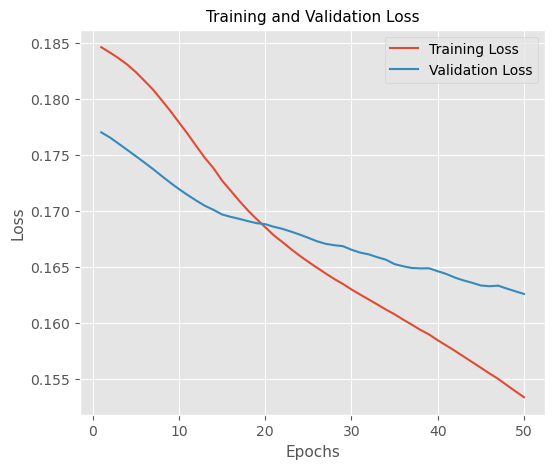

In [264]:
# Access the loss values from the history object
loss = simple_autoencoder.history['loss']

# Access the validation loss values (if applicable)
val_loss = simple_autoencoder.history['val_loss']

# Plot the loss and MSE curves
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=11)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend()
plt.show()

###### Step 5: Evaluting the model

In [265]:
# Compute RMSE for simple autoencoder
simple_autoencoder_rmse = np.sqrt(np.mean((X_test - autoencoder.predict(X_test))**2))
# Compute MSE for simple autoencoder
simple_autoencoder_mse = mean_squared_error(X_test, autoencoder.predict(X_test))
# Compute MAE for a simple autoencoder
simple_autoencoder_mae = np.mean(np.abs(X_test - autoencoder.predict(X_test)))

3/3 [==============================] - 0s 2ms/step


In [266]:
print("Simple Autoencoder RMSE:", simple_autoencoder_rmse)
# Print the MAE
print("Mean Absolute Error (MAE):", simple_autoencoder_mae)

Simple Autoencoder MSE: 0.1600123013703231
Simple Autoencoder RMSE: 0.4000153764173611
Mean Absolute Error (MAE): 0.3756792018186471


### Deep Autoencoder

###### Step 1: getting the dataset into required  form for modelling

In [267]:
# Create user-item interaction matrix (sparse matrix)
interaction_matrix = pd.pivot_table(ratings, index='CustomerID', columns='ProductID', values='Rate', fill_value=0)

In [268]:
interaction_matrix

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
13874,5.0,0.0,5.0,0.000000,4.0,0.0,0.0,3.0,5.0,5.0,...,3.5,4.0,4.0,0.0,5.0,0.0,0.0,4.0,3.0,5.0
13879,0.0,3.5,2.0,0.000000,2.0,0.0,0.0,0.0,0.0,3.5,...,5.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
13885,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4.0,0.0,4.0,...,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103988,0.0,0.0,0.0,5.000000,0.0,0.0,0.0,0.0,0.0,5.0,...,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
103991,0.0,0.0,0.0,2.000000,5.0,2.0,0.0,2.0,0.0,5.0,...,2.0,0.0,0.0,3.5,2.0,0.0,0.0,0.0,0.0,0.0
103992,0.0,0.0,0.0,4.000000,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,4.0


In [269]:
# Convert the interaction matrix to a NumPy array
X = interaction_matrix.values

In [270]:
# Normalize the ratings to a range of 0 to 1 (if needed)
max_rating = np.max(X)
X = X / max_rating

In [271]:
# Split the data into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [272]:
# Autoencoder model architecture
input_shape = X_train.shape[1]  # Number of items
latent_dim = 1  # Number of latent dimensions for user and item embeddings

###### Step 2: training the model

In [273]:
# Encoder
input_layer = Input(shape=(input_shape,))
encoder_layer_1 = Dense(128, activation='relu')(input_layer)
encoder_layer_2 = Dense(64, activation='relu')(encoder_layer_1)
encoder = Dense(latent_dim, activation='relu')(encoder_layer_2)

In [274]:
# Decoder
decoder_layer_1 = Dense(64, activation='relu')(encoder)
decoder_layer_2 = Dense(128, activation='relu')(decoder_layer_1)
decoder = Dense(input_shape, activation='sigmoid')(decoder_layer_2)

In [275]:
# Autoencoder model
deep_auto = Model(inputs=input_layer, outputs=decoder)

In [276]:
# Compile the model
deep_auto.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')

In [277]:
# Train the model
epochs = 50
batch_size = 64
deep_autoencoder = deep_auto.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 46ms/step - loss: 0.1846 - val_loss: 0.1766
Epoch 2/50
4/4 [==============================] - 0s 17ms/step - loss: 0.1825 - val_loss: 0.1739
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 0.1778 - val_loss: 0.1718
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.1718 - val_loss: 0.1680
Epoch 5/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1666 - val_loss: 0.1657
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1602 - val_loss: 0.1596
Epoch 7/50
4/4 [==============================] - 0s 16ms/step - loss: 0.1536 - val_loss: 0.1550
Epoch 8/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1440 - val_loss: 0.1473
Epoch 9/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1345 - val_loss: 0.1369
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1261 - val_loss: 0.1325
Epoch 11/50
4/4 [============

###### Step 3: Using the model for recommendation

In [278]:
# Create the encoder model
encoder_model_deep = Model(inputs=input_layer, outputs=encoder)
# Get item embeddings from the trained autoencoder weights
item_embeddings = encoder_model_deep.predict(np.eye(X_train.shape[1]))

22/22 [==============================] - 0s 1ms/step


In [279]:
# Function to get user embeddings
def get_user_embedding(user_id):
    user_embedding = encoder_model_deep.predict(X_train[user_id:user_id + 1])
    return user_embedding

In [280]:
# Function to get recommended items for a given user
def get_recommendations(user_embedding, n=5):
    # Compute the similarity between the user and all items using dot product
    similarity_scores = np.dot(item_embeddings, user_embedding.T)
    # Sort items based on similarity scores and get top-N recommended items
    top_n_items = np.argsort(similarity_scores, axis=0)[::-1][:n]
    return top_n_items

In [281]:
# Example: Get top 5 recommended items for user with user_id=0
user_id = 3
user_embedding = get_user_embedding(user_id)
recommended_items = get_recommendations(user_embedding, n=5)
print(recommended_items)

1/1 [==============================] - 0s 24ms/step
[[169]
 [139]
 [ 15]
 [221]
 [ 76]]


###### Step 4: ploting the loss graph

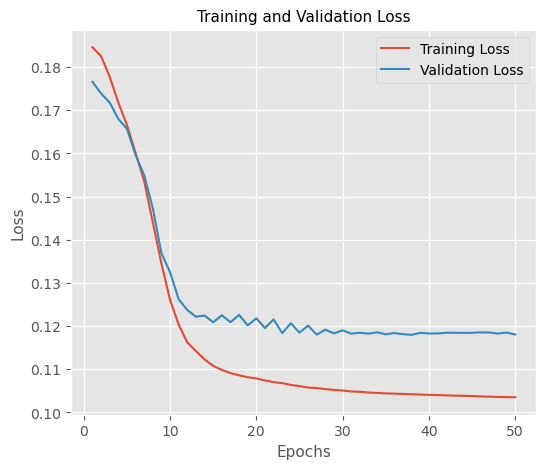

In [282]:
# Access the loss values from the history object
loss = deep_autoencoder.history['loss']
# Access the validation loss values (if applicable)
val_loss = deep_autoencoder.history['val_loss']
# Plot the loss and MSE curves
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(6, 5))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=11)
plt.xlabel('Epochs', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend()
plt.show()

###### Step 5: Evaluting the model

In [283]:
# Compute RMSE for deep autoencoder
deep_autoencoder_rmse = np.sqrt(np.mean((X_test - deep_auto.predict(X_test))**2))
# Compute MSE for deep autoencoder
deep_autoencoder_mse = mean_squared_error(X_test, deep_auto.predict(X_test))
# Compute MAE for a simple autoencoder
deep_autoencode_mae = np.mean(np.abs(X_test - deep_auto.predict(X_test)))

3/3 [==============================] - 0s 3ms/step


In [284]:
# Assuming you have trained the deep autoencoder and simple autoencoder models and got their predictions on the test set
print("Deep Autoencoder RMSE:", deep_autoencoder_rmse)
print("Deep Autoencoder MAE:", deep_autoencode_mae)

Deep Autoencoder RMSE: 0.3501136853911387
Deep Autoencoder MSE: 0.12257959269816522
Deep Autoencoder MAE: 0.28899040109382984


### Restricted Boltzmann Machine Model

Now, we can start formatting the data into input for the RBM. We're going to store the normalized users ratings into as a matrix of user-rating called trX, and normalize the values.

###### Step 1: Preparing the dataset to fit the model

In [285]:
user_rating_df = ratings.pivot_table(index='CustomerID', columns='ProductID', values='Rate',aggfunc='first')
user_rating_df.head()

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,...,1.0,1.0,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0
13874,5.0,NaN,5.0,NaN,4.0,NaN,NaN,3.0,5.0,5.0,...,3.0,5.0,3.0,NaN,5.0,NaN,NaN,3.0,3.0,5.0
13879,NaN,2.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,...,5.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,2.0,NaN
13885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,...,4.0,NaN,4.0,4.0,4.0,NaN,NaN,4.0,NaN,4.0


Lets normalize it now:

In [286]:
norm_user_rating_df = user_rating_df.fillna(0) / 5.0
trX = norm_user_rating_df.values
trX[0:5]

array([[0. , 0.2, 0. , ..., 0. , 0. , 0.2],
       [0.2, 0.2, 0.2, ..., 0.2, 0.2, 0.2],
       [1. , 0. , 1. , ..., 0.6, 0.6, 1. ],
       [0. , 0.4, 0.4, ..., 0. , 0.4, 0. ],
       [0. , 0. , 0. , ..., 0.8, 0. , 0.8]])

### Setting the Model's Parameters

In [287]:
hiddenUnits = 20
visibleUnits =  len(user_rating_df.columns)

vb = tf.Variable(tf.zeros([visibleUnits]), tf.float32) #Number of unique movies
hb = tf.Variable(tf.zeros([hiddenUnits]), tf.float32) #Number of features we're going to learn
W = tf.Variable(tf.zeros([visibleUnits, hiddenUnits]), tf.float32)

In [288]:
v0 = tf.zeros([visibleUnits], tf.float32)
#testing to see if the matrix product works
tf.matmul([v0], W)

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [289]:
#Phase 1: Input Processing
#defining a function to return only the generated hidden states 
def hidden_layer(v0_state, W, hb):
    h0_prob = tf.nn.sigmoid(tf.matmul([v0_state], W) + hb)  #probabilities of the hidden units
    h0_state = tf.nn.relu(tf.sign(h0_prob - tf.random.uniform(tf.shape(h0_prob)))) #sample_h_given_X
    return h0_state

#printing output of zeros input
h0 = hidden_layer(v0, W, hb)
print("first 15 hidden states: ", h0[0][0:15])

def reconstructed_output(h0_state, W, vb):
    v1_prob = tf.nn.sigmoid(tf.matmul(h0_state, tf.transpose(W)) + vb) 
    v1_state = tf.nn.relu(tf.sign(v1_prob - tf.random.uniform(tf.shape(v1_prob)))) #sample_v_given_h
    return v1_state[0]


v1 = reconstructed_output(h0, W, vb)
print("hidden state shape: ", h0.shape)
print("v0 state shape:  ", v0.shape)
print("v1 state shape:  ", v1.shape)

first 15 hidden states:  tf.Tensor([0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.], shape=(15,), dtype=float32)
hidden state shape:  (1, 20)
v0 state shape:   (691,)
v1 state shape:   (691,)


And set the error function, which in this case will be the Mean Absolute Error Function.

In [290]:
def error(v0_state, v1_state):
    return tf.reduce_mean(tf.square(v0_state - v1_state))

err = tf.reduce_mean(tf.square(v0 - v1))
print("error" , err.numpy())

error 0.5079595


Now we train the RBM with 5 epochs with each epoch using a batchsize of 500, giving 12 batches. After training, we print out a graph with the error by epoch.

Epoch: 1 batch #: 0  of 5 sample #: 63 reconstruction error: 0.482200
Epoch: 1 batch #: 1  of 5 sample #: 63 reconstruction error: 0.408104
Epoch: 1 batch #: 2  of 5 sample #: 63 reconstruction error: 0.315832
Epoch: 1 batch #: 3  of 5 sample #: 63 reconstruction error: 0.313632
Epoch: 1 batch #: 4  of 5 sample #: 63 reconstruction error: 0.383734
Epoch: 1 batch #: 5  of 5 sample #: 23 reconstruction error: 0.242489
Epoch: 2 batch #: 0  of 5 sample #: 63 reconstruction error: 0.492619
Epoch: 2 batch #: 1  of 5 sample #: 63 reconstruction error: 0.405210
Epoch: 2 batch #: 2  of 5 sample #: 63 reconstruction error: 0.301650
Epoch: 2 batch #: 3  of 5 sample #: 63 reconstruction error: 0.300897
Epoch: 2 batch #: 4  of 5 sample #: 63 reconstruction error: 0.381418
Epoch: 2 batch #: 5  of 5 sample #: 23 reconstruction error: 0.241042
Epoch: 3 batch #: 0  of 5 sample #: 63 reconstruction error: 0.473517
Epoch: 3 batch #: 1  of 5 sample #: 63 reconstruction error: 0.383502
Epoch: 3 batch #: 2 

Epoch: 20 batch #: 3  of 5 sample #: 63 reconstruction error: 0.355890
Epoch: 20 batch #: 4  of 5 sample #: 63 reconstruction error: 0.400232
Epoch: 20 batch #: 5  of 5 sample #: 23 reconstruction error: 0.093719
Epoch: 21 batch #: 0  of 5 sample #: 63 reconstruction error: 0.463097
Epoch: 21 batch #: 1  of 5 sample #: 63 reconstruction error: 0.324168
Epoch: 21 batch #: 2  of 5 sample #: 63 reconstruction error: 0.256787
Epoch: 21 batch #: 3  of 5 sample #: 63 reconstruction error: 0.350970
Epoch: 21 batch #: 4  of 5 sample #: 63 reconstruction error: 0.426860
Epoch: 21 batch #: 5  of 5 sample #: 23 reconstruction error: 0.136845
Epoch: 22 batch #: 0  of 5 sample #: 63 reconstruction error: 0.470333
Epoch: 22 batch #: 1  of 5 sample #: 63 reconstruction error: 0.344428
Epoch: 22 batch #: 2  of 5 sample #: 63 reconstruction error: 0.253893
Epoch: 22 batch #: 3  of 5 sample #: 63 reconstruction error: 0.345181
Epoch: 22 batch #: 4  of 5 sample #: 63 reconstruction error: 0.390680
Epoch:

Epoch: 40 batch #: 0  of 5 sample #: 63 reconstruction error: 0.450362
Epoch: 40 batch #: 1  of 5 sample #: 63 reconstruction error: 0.298119
Epoch: 40 batch #: 2  of 5 sample #: 63 reconstruction error: 0.256208
Epoch: 40 batch #: 3  of 5 sample #: 63 reconstruction error: 0.357048
Epoch: 40 batch #: 4  of 5 sample #: 63 reconstruction error: 0.377656
Epoch: 40 batch #: 5  of 5 sample #: 23 reconstruction error: 0.128741
Epoch: 41 batch #: 0  of 5 sample #: 63 reconstruction error: 0.475832
Epoch: 41 batch #: 1  of 5 sample #: 63 reconstruction error: 0.312590
Epoch: 41 batch #: 2  of 5 sample #: 63 reconstruction error: 0.222344
Epoch: 41 batch #: 3  of 5 sample #: 63 reconstruction error: 0.340260
Epoch: 41 batch #: 4  of 5 sample #: 63 reconstruction error: 0.368683
Epoch: 41 batch #: 5  of 5 sample #: 23 reconstruction error: 0.081274
Epoch: 42 batch #: 0  of 5 sample #: 63 reconstruction error: 0.472648
Epoch: 42 batch #: 1  of 5 sample #: 63 reconstruction error: 0.292330
Epoch:

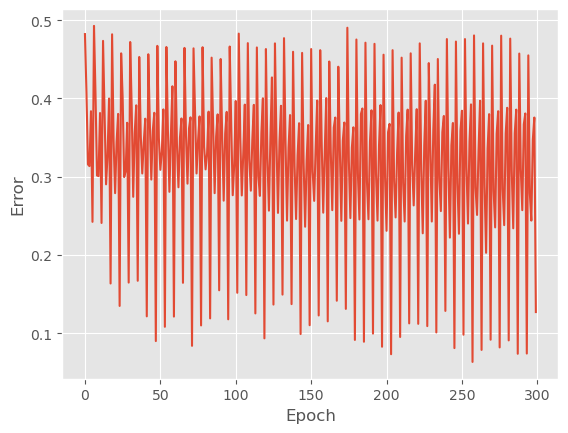

In [291]:
epochs = 50
batchsize = 64
errors = []
weights = []
K=1
alpha = 0.1
#creating datasets
train_ds = \
    tf.data.Dataset.from_tensor_slices((np.float32(trX))).batch(batchsize)
v0_state=v0
for epoch in range(epochs):
    batch_number = 0
    for batch_x in train_ds:
        for i_sample in range(len(batch_x)):           
            for k in range(K):
                v0_state = batch_x[i_sample]
                h0_state = hidden_layer(v0_state, W, hb)
                v1_state = reconstructed_output(h0_state, W, vb)
                h1_state = hidden_layer(v1_state, W, hb)
                delta_W = tf.matmul(tf.transpose([v0_state]), h0_state) - tf.matmul(tf.transpose([v1_state]), h1_state)
                W = W + alpha * delta_W
                vb = vb + alpha * tf.reduce_mean(v0_state - v1_state, 0)
                hb = hb + alpha * tf.reduce_mean(h0_state - h1_state, 0) 
                v0_state = v1_state
            if i_sample == len(batch_x)-1:
                err = error(batch_x[i_sample], v1_state)
                errors.append(err)
                weights.append(W)
                print ( 'Epoch: %d' % (epoch + 1), 
                       "batch #: %i " % batch_number, "of %i" % (len(trX)/batchsize), 
                       "sample #: %i" % i_sample,
                       'reconstruction error: %f' % err)
        batch_number += 1
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [292]:
# Calculate the Mean Absolute Error (MAE) from the list of errors
mae = np.mean(errors)
print('Mean Absolute Error (MAE): %f' % mae)
rmse = np.sqrt(np.mean(errors))
print('Root Mean Squared Error (RMSE): %f' % rmse)

Mean Absolute Error (MAE): 0.317655
Root Mean Squared Error (RMSE): 0.563609


### Recommendation
We can now predict movies that an arbitrarily selected user might like. This can be accomplished by feeding in the user's watched movie preferences into the RBM and then reconstructing the input. The values that the RBM gives us will attempt to estimate the user's preferences for movies that he hasn't watched based on the preferences of the users that the RBM was trained on.

Lets first select a User ID of our mock user:

In [293]:
mock_user_id = 6

In [294]:
#Selecting the input user
inputUser = trX[mock_user_id-1].reshape(1, -1)
inputUser = tf.convert_to_tensor(trX[mock_user_id-1],"float32")
v0 = inputUser
print(v0)
v0.shape

tf.Tensor(
[0.  0.  0.6 0.  0.  0.  0.6 0.6 0.  0.  0.  0.6 0.  0.  0.6 0.  0.  0.6
 0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.6 0.6
 0.6 0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.6 0.  0.  0.6
 0.  0.  0.  0.  0.6 0.6 0.6 0.  0.  0.6 0.  0.6 0.  0.  0.6 0.  0.  0.
 0.  0.  0.6 0.  0.  0.  0.6 0.  0.6 0.  0.6 0.  0.  0.  0.  0.6 0.  0.
 0.6 0.  0.  0.6 0.6 0.  0.  0.  0.6 0.  0.6 0.6 0.  0.  0.6 0.6 0.  0.6
 0.6 0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.
 0.6 0.  0.  0.  0.  0.6 0.6 0.  0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.
 0.  0.  0.6 0.6 0.  0.  0.  0.  0.6 0.  0.6 0.  0.6 0.6 0.  0.  0.  0.6
 0.  0.  0.6 0.  0.  0.  0.6 0.6 0.  0.  0.6 0.  0.  0.  0.  0.6 0.  0.6
 0.  0.  0.  0.  0.6 0.  0.  0.  0.  0.6 0.  0.  0.  0.6 0.  0.  0.  0.
 0.  0.  0.6 0.  0.6 0.  0.6 0.  0.  0.  0.  0.  0.  0.6 0.  0.  0.  0.6
 0.  0.6 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.6 0.  0.6 0.6 0.6 0.  0.
 0.6 0.6 0.  0.  0.  0.  0.6 0.  0.6 0.  0.  0

TensorShape([691])

In [295]:
v0test = tf.zeros([visibleUnits], tf.float32)
v0test.shape

TensorShape([691])

In [296]:
#Feeding in the user and reconstructing the input

hh0 = tf.nn.sigmoid(tf.matmul([v0], W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
rec = vv1

tf.maximum(rec,1)
for i in vv1:
    print(i)

tf.Tensor(
[0.2805712  0.3448621  0.18218975 0.09265612 0.13925774 0.11904078
 0.25700563 0.58383286 0.22066425 0.07298674 0.05511284 0.45968956
 0.3270094  0.09435215 0.16496594 0.08305596 0.14412102 0.30970585
 0.35855392 0.25699562 0.3678083  0.35399356 0.22414884 0.28870457
 0.15166315 0.49457002 0.59827703 0.23477271 0.3054482  0.36318466
 0.24204515 0.21728326 0.20399049 0.43494114 0.200772   0.29699257
 0.4057261  0.4154319  0.46466896 0.09609067 0.1622363  0.1763118
 0.23840646 0.0861405  0.21727844 0.24571636 0.20076968 0.48457417
 0.09783722 0.15688887 0.37248844 0.1595727  0.43004623 0.09266356
 0.24204311 0.15165475 0.20075648 0.2494407  0.20076503 0.11288461
 0.19130571 0.40572745 0.17342071 0.30539438 0.37717867 0.43008524
 0.08005749 0.15689042 0.33143574 0.2420289  0.05942664 0.37245125
 0.19440866 0.09959971 0.200758   0.14164919 0.3097438  0.22762553
 0.16498168 0.07164803 0.24202164 0.29699773 0.2765681  0.48959863
 0.36318395 0.33587447 0.18218443 0.4399137  0.20076

We can then list the 20 most recommended movies for our mock user by sorting it by their scores given by our model.

In [297]:
scored_products_df_mock = products[products['Id'].isin(user_rating_df.columns)]
scored_products_df_mock = scored_products_df_mock.assign(RecommendationScore = rec[0])
scored_products_df_mock.sort_values(["RecommendationScore"], ascending=False).head(20)

,Id,Name,UnitPrice,RecommendationScore
457,458,Le Vian Diamond Butterfly Necklace 3/4 ct tw 1...,2999.99,0.749935
669,670,The Pirates: The Last Royal Treasure,50.00,0.738545
235,236,Black & White Diamond Promise Ring 1/6 ct tw S...,219.00,0.722739
625,626,Laptop HP 14s-cf2527TU i3-10110U/4GB/256GB/14....,650.00,0.693896
202,203,Promise Ring 1/10 ct Diamond 10K White Gold,499.00,0.693883
450,451,Triangle Necklace 14K Yellow Gold,499.99,0.689631
547,548,Unstoppable Love Necklace Lab-Created Sapphire...,99.99,0.689627
90,91,Giày Sneaker Unisex Sk8 Hi Vans - True White,20.00,0.680990
351,352,Black Silicone Women's Wedding Band,23.99,0.663385
512,513,Angel Wing Necklace 1/10 ct tw Diamond Sterlin...,189.00,0.663381


Now, we can find all the movies that our mock user has watched before:

In [298]:
products_df_mock = ratings[ratings['CustomerID'] == mock_user_id]
products_df_mock.head()

,CustomerID,ProductID,Rate
55,6,258,1
133,6,424,1
324,6,539,1
521,6,422,1
757,6,590,1


### Neighborhood-based Models

In [299]:
from surprise import Dataset
from surprise import accuracy
from surprise import Reader

from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV

In [300]:
product_customers=ratings.pivot_table(values='Rate', index='CustomerID', columns='ProductID', fill_value=0)
product_customers.head()

ProductID,1,2,3,4,5,6,7,8,9,10,...,682,683,684,685,686,687,688,689,690,691
CustomerID,,,,,,,,,,,,,,,,,,,,,
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
13874,5.0,0.0,5.0,0.0,4.0,0.0,0.0,3.0,5.0,5.0,...,3.5,4.0,4.0,0.0,5.0,0.0,0.0,4.0,3.0,5.0
13879,0.0,3.5,2.0,0.0,2.0,0.0,0.0,0.0,0.0,3.5,...,5.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
13885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,...,4.0,0.0,4.0,4.0,4.0,0.0,0.0,4.0,0.0,4.0


In [301]:
mat_product_customers=csr_matrix(product_customers.values)

In [302]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings,reader)

In [303]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.2,random_state=10)

In [304]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=1, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [305]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [306]:
test_pred

[Prediction(uid=103678, iid=289, r_ui=4.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103699, iid=615, r_ui=5.0, est=4.0, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103774, iid=330, r_ui=4.0, est=3.744007390479895, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103308, iid=202, r_ui=5.0, est=5, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103713, iid=171, r_ui=1.0, est=1.0274409044193216, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103784, iid=37, r_ui=4.0, est=3.9474986036862685, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=6, iid=117, r_ui=1.0, est=1, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103768, iid=148, r_ui=3.0, est=3.068690481945183, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(uid=103854, iid=446, r_ui=2.0, est=1.919070010449321, details={'actual_k': 1, 'was_impossible': False}),
 Prediction(u

In [308]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)
accuracy.mae(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.6522
MSE: 2.7297
MAE:  1.0764


1.076408522278705

### Singular Value Decomposition(SVD)

In [309]:
from surprise import Dataset, Reader, SVD
from surprise.accuracy import rmse, mae

In [310]:
# Assuming you have a DataFrame 'ratings_df' with columns: 'user_id', 'item_id', and 'rating'

# Create a Surprise Dataset and Reader
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['CustomerID', 'ProductID', 'Rate']], reader)
data

In [311]:
# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [312]:
# Define the number of latent factors (K)
K = 1  # Adjust this value as needed

In [313]:
# Create and train the SVD model
model = SVD(n_factors=K)
model.fit(trainset)

In [314]:
# Get the predictions for the test set
predictions = model.test(testset)

In [316]:
# Calculate RMSE
rmse_score = rmse(predictions)
print("RMSE:", rmse_score)
# Calculate RMSE
mae_score = mae(predictions)
print("MAE:", mae_score)

RMSE: 1.0599
RMSE: 1.059918462658487
MAE:  0.7743
MAE: 0.7743338736762782


In [317]:
# Function to get top-N recommended items for a given user
def get_top_n_recommendations(user_id, n=5):
    # Get a list of all item IDs
    all_item_ids = ratings['ProductID'].unique()
    # Get the ratings given by the user (if any) to the items in the dataset
    user_ratings = ratings[ratings['CustomerID'] == user_id][['ProductID', 'Rate']]
    # Create a set of items already rated by the user
    rated_items = set(user_ratings['ProductID'])
    # Get the item IDs for items that the user has not rated
    unrated_items = [item_id for item_id in all_item_ids if item_id not in rated_items]
    # Create a list of (item_id, predicted_rating) tuples for unrated items
    unrated_predictions = [(item_id, model.predict(user_id, item_id).est) for item_id in unrated_items]
    # Sort the list based on predicted ratings in descending order
    unrated_predictions.sort(key=lambda x: x[1], reverse=True)
    # Get the top-N recommended items
    top_n_items = [item_id for item_id, _ in unrated_predictions[:n]]

    return top_n_items


In [318]:
import random  # Don't forget to import the 'random' module


# Example: Get top 5 recommended items for a random user
random_user = random.choice(ratings['CustomerID'].unique())
recommended_items = get_top_n_recommendations(random_user, n=5)
print("Recommended items for User", random_user, ":", recommended_items)

Recommended items for User 103709 : [617, 414, 82, 428, 275]


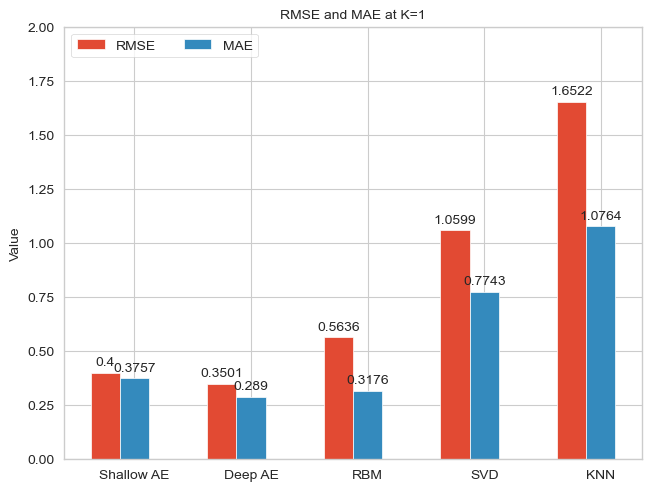

In [366]:
## fOR K = 1
model = ("Shallow AE","Deep AE",'RBM', 'SVD', 'KNN')
evaluation = {
    'RMSE': (0.4000 ,0.3501 ,0.5636,1.0599,1.6522),
    'MAE': (0.3757,0.2890 , 0.3176,0.7743,1.0764),
}

x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')
for attribute, measurement in evaluation.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value', fontsize=10)
ax.set_title('RMSE and MAE at K=1', fontsize=10)
ax.set_xticks(x + width, model, fontsize=10)
ax.legend(loc='upper left', ncols=3, fontsize=10)
ax.set_ylim(0, 2)

plt.show()

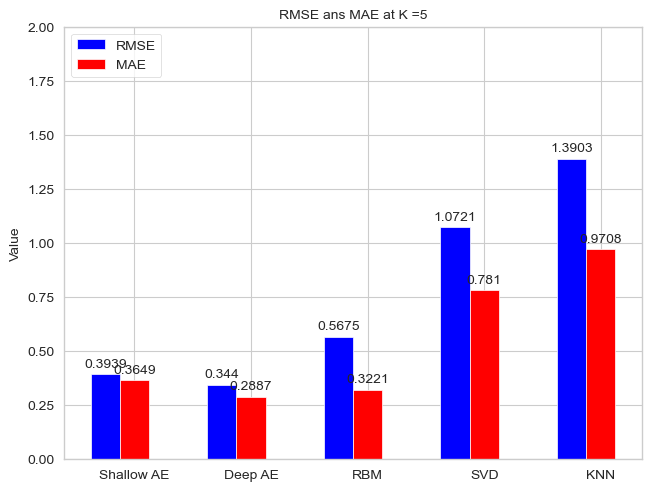

In [364]:
## For K = 5
model = ("Shallow AE", "Deep AE", 'RBM', 'SVD', 'KNN')
evaluation = {
    'RMSE': (0.3939 ,0.3440 ,0.5675,1.0721,1.3903),
    'MAE': (0.3649,0.2887 , 0.3221,0.7810,0.9708),
}

x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

# Define custom colors for RMSE and MAE bars
rmse_color = 'b'  # Blue
mae_color = 'r'   # Green

for attribute, measurement in evaluation.items():
    offset = width * multiplier
    if attribute == 'RMSE':
        color = rmse_color
    elif attribute == 'MAE':
        color = mae_color
    else:
        color = 'gray'  # Use gray color for other attributes

    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value', fontsize=10)
ax.set_title('RMSE ans MAE at K =5', fontsize=10)
ax.set_xticks(x + width, model, fontsize=10)
ax.legend(loc='upper left', fontsize=10)
ax.set_ylim(0, 2)

plt.show()


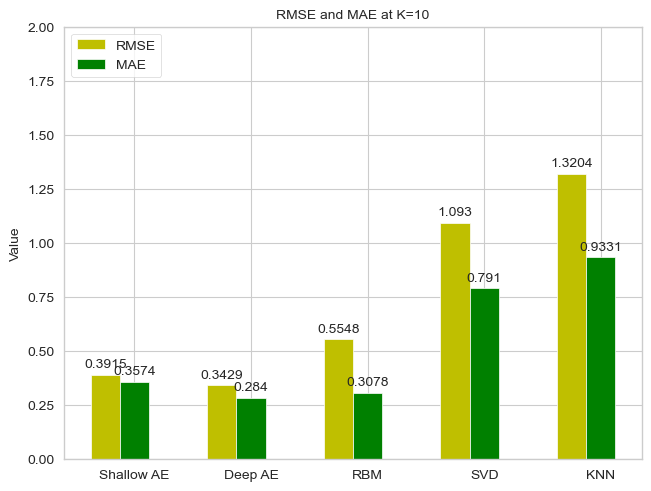

In [365]:
## For K = 10
model = ("Shallow AE", "Deep AE", 'RBM', 'SVD', 'KNN')
evaluation = {
    'RMSE': (0.3915, 0.3429, 0.5548, 1.0930, 1.3204),
    'MAE': (0.3574, 0.2840, 0.3078, 0.7910, 0.9331),
}

x = np.arange(len(model))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0
fig, ax = plt.subplots(layout='constrained')

# Define custom colors for RMSE and MAE bars
rmse_color = 'y'  # Blue
mae_color = 'g'   # Green

for attribute, measurement in evaluation.items():
    offset = width * multiplier
    if attribute == 'RMSE':
        color = rmse_color
    elif attribute == 'MAE':
        color = mae_color
    else:
        color = 'gray'  # Use gray color for other attributes

    rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Value', fontsize=10)
ax.set_title('RMSE and MAE at K=10', fontsize=10)
ax.set_xticks(x + width, model, fontsize=10)
ax.legend(loc='upper left', fontsize=10)
ax.set_ylim(0, 2)

plt.show()
